# Deterministic Models and Optimization: Clustering methods, K-Means

**Note**: hand-made kmeans algorithm using synthetic data

In [1]:
import numpy as np
import math
from numpy import random
import pandas as pd
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set_palette("deep")


/Users/polinab/.virtualenvs/base/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#Simulate the data

X1 = np.random.uniform(low= 0, high=25, size=(200))
X2 = np.random.uniform(low=5, high = 30, size=(200))
df = pd.DataFrame({'i': X1, 'j':X2})

In [3]:
df

,i,j
0,24.548619,10.974207
1,3.745069,21.771401
2,1.511845,28.374741
3,0.597495,22.457266
4,2.037682,27.608804
...,...,...
195,6.166747,27.192912
196,1.111264,23.725987
197,9.112094,24.824107
198,4.326878,9.981615


<AxesSubplot:xlabel='i', ylabel='j'>

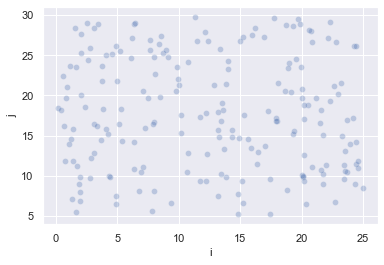

In [4]:
# fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(data=df,x='i', y='j', alpha=0.3)


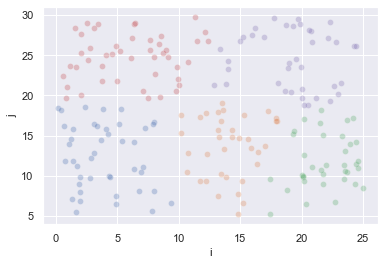

In [5]:
#using package to compare

from sklearn.cluster import KMeans

n = 5

kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
df['sk_label'] = kmeans.labels_

for i in range(n):
    sns.scatterplot(data=df[df.sk_label == i],x='i', y='j', alpha=0.3)


In [6]:
# THE **from-scratch** ALGORITHM:

def means_to_np(m,n): 
    mean_array = [np.array(row) for row in m.to_numpy()]
    return mean_array

def get_centroids(d,n):
    centroids = []
    for _ in range(n):
        c = np.array([])
        for i in range(len(d.columns)):
            c = np.append(c, d.sample().values[0][i])
        centroids.append(c)
    return centroids

def euclidean(a, b):
    return sum((p-q)**2 for p, q in zip(a, b)) ** .5

def assign_clusters(d, n, c):
    centroids = c
    assignments = []
    d.drop('assignments',inplace=True,axis=1, errors='ignore')
    for x in d[[col for col in d.columns]].to_numpy():
        distances = [euclidean(x,y) for y in centroids]
        assignments.append(distances.index(min(distances)))
    d['assignments'] = pd.Series(assignments)
    return d

def mykmeans(d,n):
    c = get_centroids(d,n)
    assigned_df = assign_clusters(d,n,c)
    means = assigned_df.groupby('assignments').mean()
    mpath=means

    reassigned_df = assign_clusters(d,n,means_to_np(means,n))
    newmeans = reassigned_df.groupby('assignments').mean()
    
    diff = False
    while diff == False:
        reassigned_df = assign_clusters(d,n,means_to_np(means,n))
        newmeans = reassigned_df.groupby('assignments').mean()
        diff = means.equals(newmeans)
        mpath = mpath.append(newmeans)
        means=newmeans

    return reassigned_df,means,mpath

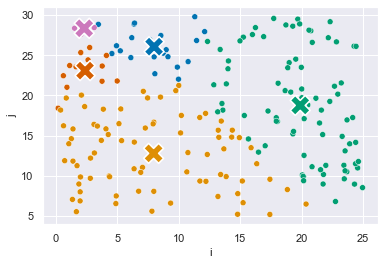

In [7]:
# implementation of 1 run with 5 clusters (no converging):
c = get_centroids(df,5)
assigned_df = assign_clusters(df,5,c)
means = assigned_df.groupby('assignments').mean()

g = sns.scatterplot(data=assigned_df,x='i',y='j',hue='assignments',palette='colorblind')
g = sns.scatterplot(data=means,x='i',y='j',hue='assignments',marker='X',s=400,palette='colorblind')
g.legend_.remove()


Text(0.5, 1.0, 'K-Means Clustering Showing "Traveling Means"')

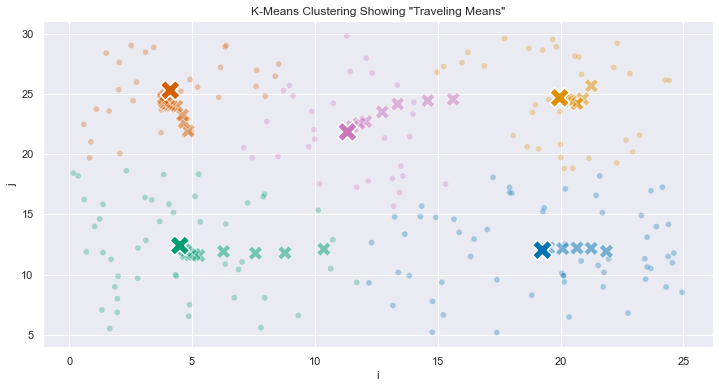

In [8]:
data,m,mpath = mykmeans(df,5)
plt.figure(figsize=(12,6))

g = sns.scatterplot(data=data,x='i',y='j',hue='assignments',palette='colorblind',alpha=0.3)
g = sns.scatterplot(data=mpath,x='i',y='j',hue='assignments',marker='X',s=200,alpha=0.5,palette='colorblind')
g = sns.scatterplot(data=m,x='i',y='j',hue='assignments',marker='X',s=400,palette='colorblind')
g.legend_.remove()
g.set_title('K-Means Clustering Showing "Traveling Means"')


In [9]:
# load data from google drive

synthetic = pd.read_csv('synthetic.txt', sep="    ", header=None)
synthetic.columns = ["i", "j"]

thyroid = pd.read_csv('thyroid.txt', sep="  ", header=None)
thyroid.apply(pd.to_numeric)
thyroid.columns = ['a', 'b','c','d','e']


<ipython-input-9-e3187d420c64>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  synthetic = pd.read_csv('synthetic.txt', sep="    ", header=None)
<ipython-input-9-e3187d420c64>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  thyroid = pd.read_csv('thyroid.txt', sep="  ", header=None)


Text(0.5, 1.0, 'K-Means Clustering Showing "Traveling Means"')

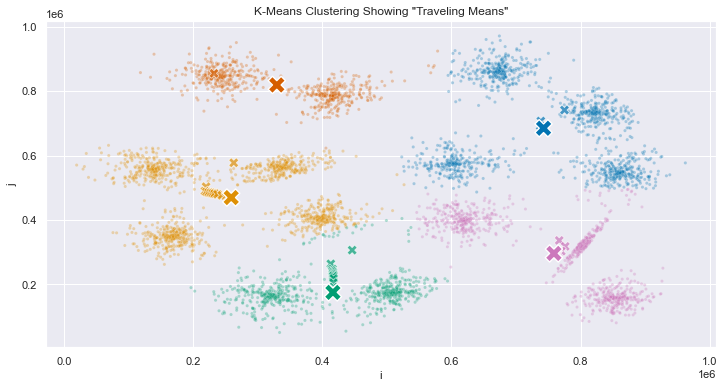

In [10]:
# implementation and visualization using class data

sdata,sm,smpath = mykmeans(synthetic,5)
plt.figure(figsize=(12,6))

g = sns.scatterplot(data=sdata,x='i',y='j',hue='assignments',alpha=0.3,s=10,palette='colorblind')
g = sns.scatterplot(data=smpath,x='i',y='j',hue='assignments',marker='X',s=100,alpha=0.7,palette='colorblind')
g = sns.scatterplot(data=sm,x='i',y='j',hue='assignments',marker='X',s=300,color='r',palette='colorblind')
g.legend_.remove()
g.set_title('K-Means Clustering Showing "Traveling Means"')



Text(0.5, 1.0, 'K-Means Clustering With K=15')

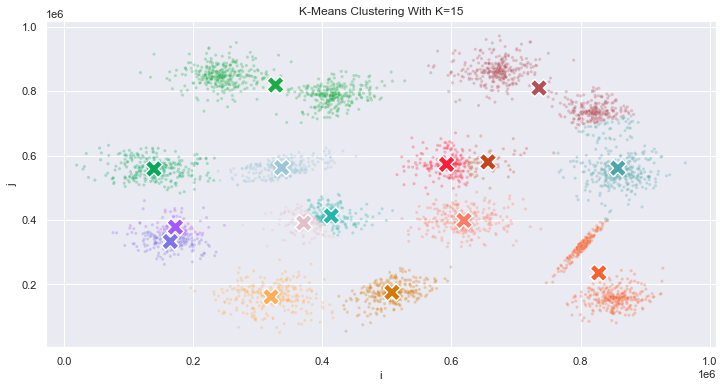

In [11]:
colors = sns.color_palette(["#D4790C", '#7D74E8','#A259F8','#09A85D',\
                           '#C5461E','#4EA6AA','#B3505A','#2AB4AE',\
                           '#FA7D68','#FE1D36','#1CAC47','#F66230',\
                           '#9CC6D6','#E2BFCA','#FEAD5B'])


sdata,sm,smpath = mykmeans(synthetic,15)
plt.figure(figsize=(12,6))

g = sns.scatterplot(data=sdata,x='i',y='j',hue='assignments',alpha=0.3,s=10,palette=colors)
# g = sns.scatterplot(data=smpath,x='i',y='j',hue='assignments',marker='X',s=100,alpha=0.7,palette='colorblind')
g = sns.scatterplot(data=sm,x='i',y='j',hue='assignments',marker='X',s=300,palette=colors)
g.legend_.remove()
g.set_title('K-Means Clustering With K=15')


In [25]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(sdata[['i','j']], sdata.assignments)


0.746566387819819

In [26]:
# now for thyroid data set:

tdata,tm,tpath = mykmeans(thyroid,5)

tdata


,a,b,c,d,e,assignments
0,3195023,3455331,3497964,3068822,3206710,3
1,3651455,3412754,4131996,3248619,3603214,1
2,4716462,4051411,3638860,3150548,2946503,1
3,3347167,2433481,3075276,3150548,3058020,3
4,3042879,2859252,3004828,3166893,2859768,3
...,...,...,...,...,...,...
210,4031814,2688944,2863932,3199583,4297098,1
211,5629326,2199307,2441244,3624557,3652778,1
212,2890735,2390904,2934380,3117858,3491697,3
213,2434303,2305750,2723036,3264964,4433397,3


In [27]:
davies_bouldin_score(tdata[['a','b','c','d','e']], tdata.assignments)


1.0834269797910228

0.7396651524812375
0.8212963870316781
1.0891841174390948
0.9951566635187478
1.1577304398072832
1.147318326454829
0.903209950866998
0.962662055185176
1.011109220176891
0.9666665700596078
1.0058269526869383
0.9630747603786551
1.0276828837512268
0.9776466005746531
0.9918966870155981
0.9897394140053152
1.1014665361843266
0.996677354784146


Text(0.5, 1.0, 'Davies-Bouldin Score of K Clusters')

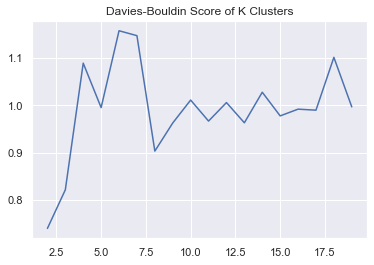

In [34]:
#index 1

scores = []
k = []
for n in range(2,20):
    tdata,tm,tpath = mykmeans(thyroid,n)
    k.append(n)
    score = davies_bouldin_score(tdata[['a','b','c','d','e']], tdata.assignments)
    print(score)
    scores.append(score)
    
sns.lineplot(x=k,y=scores).set_title('Davies-Bouldin Score of K Clusters')

# comment that 8 is best-scoring (lower) k


In [62]:
import numpy as np

def δ(ck, cl):
    values = np.ones([len(ck), len(cl)])
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)

def Δ(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)

def dunn(k_list):
    δs = np.ones([len(k_list), len(k_list)])
    Δs = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            δs[k, l] = δ(k_list[k], k_list[l])
        
        Δs[k] = Δ(k_list[k])

    di = np.min(δs)/np.max(Δs)
    return di


1.2175122317496207e-07

In [85]:
def get_dunn(d,k):

    tdata,tm,tpath = mykmeans(d,k)
    k_list = []
    for i in tdata.assignments.unique().tolist():
        k_list.append(tdata[tdata.assignments == i].values)
    return dunn(k_list) 



In [ ]:
scores = []
k = []
for n in range(2,40):
    try:
        score = get_dunn(thyroid,n)
    except:
        score = None
    print(score)
    k.append(n)
    scores.append(score)
    
sns.lineplot(x=k,y=scores).set_title('Dunn Score of K Clusters')

# low is bad

9.292668852348128e-08
1.1803602676750931e-07
1.1803602676750931e-07
1.1994243781925567e-07
1.8138690374908891e-07
1.2175122317496207e-07
